# Bayesian Correlated t-test
Module `correlated_ttest` in `bayesiantests` can be used to perform the correlated t-test on the performance of two classifiers that have been assessed by $m$-runs of $k$-fold cross-validation  on the same dataset

In [46]:
import numpy as np
article="Article03"
#per salvare np.savetxt('acc_model_1', matr)
Acc_model_1 = np.loadtxt('results/'+article)# l'equivalente che ho è : np.zeros((10,10),'float')
Acc_model_1 = np.reshape(Acc_model_1,100,'float')
Acc_Medvedeva = np.loadtxt('medvedeva/'+article)
Acc_Medvedeva =np.reshape(Acc_Medvedeva,100,'float')
#applico flat (o reshape) sulla mia matrice 10x10 e inizializzo le variabili
#Acc_model_1 e Acc_Medvedeva
names = ("Medvedeva","Model5")
x=np.zeros((len(Acc_model_1),2),'float')
x[:,1]=Acc_model_1
x[:,0]=Acc_Medvedeva

In [47]:
print(Acc_Medvedeva.mean())
Acc_model_1.mean()

0.7706309523809525


0.7588148893360159

Functions in the module accept the following arguments.

- `x`: a 2-d array with scores of two models (each row corresponding to a data set) or a vector of differences.
- `rope`: the region of practical equivalence. We consider two classifiers equivalent if the difference in their performance is smaller than `rope`. 
- `runs`:  number of repetitions of cross validation 
- `names`: the names of the two classifiers; if `x` is a vector of differences, positive values mean that the second (right) model had a higher score.
- `verbose`: when True the functions also prints out the probabilities

In [48]:
import bayesiantests as bt
rope=0.01
left, within, right = bt.correlated_ttest(x, rope=rope,runs=10,verbose=True,names=names)

P(Medvedeva > Model5) = 0.5314678893682416, P(rope) = 0.296559293326222, P(Model5 > Medvedeva) = 0.17197281730553637


We can also plot the posterior distribution. 

Text(0.5,0,'Medvedeva-Model5 on Article 8')

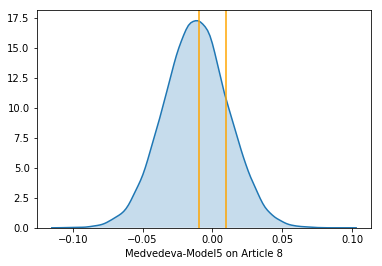

In [49]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as snb
#generate samples from posterior (it is not necesssary because the posterior is a Student)
samples=bt.correlated_ttest_MC(x, rope=rope,runs=10,nsamples=50000)
#plot posterior
snb.kdeplot(samples, shade=True) 
#plot rope region
plt.axvline(x=-rope,color='orange')
plt.axvline(x=rope,color='orange')
#add label
plt.xlabel('Medvedeva-Model5 on Article 8') 

## References 

`@ARTICLE{bayesiantests2016,
   author = {{Benavoli}, A. and {Corani}, G. and {Demsar}, J. and {Zaffalon}, M.},
   title = "{Time for a change: a tutorial for comparing multiple classifiers through Bayesian analysis}",
   journal = {ArXiv e-prints},
   archivePrefix = "arXiv",
   eprint = {1606.04316},
   url={https://arxiv.org/abs/1606.04316},
   year = 2016,
   month = jun
}`

`@article{corani2015a,
  year = {2015},
  volume = {100},
  number = {2},
  journal = {Machine Learning},
  doi = {10.1007/s10994-015-5486-z},
  title = {{A Bayesian approach for comparing cross-validated algorithms on multiple data sets}},
  publisher = {Springer US},
  author = {Corani, Giorgio and Benavoli, Alessio},
  pages = {285--304},
  url = {http://www.idsia.ch/~alessio/corani2015a.pdf}
}`